# Dynamic Mechanical Analysis of Polycarbonate

> [Return to Examples List](README.md)

This notebook demonstrates how to plot and analyse a DMA experiment to establish glass transition point from the loss modulus.

## Load Experiment Data

First, let's load the experiment data from a JSON file and convert it into a Pandas `DataFrame`.

In [1]:
# This is just to ensure you have the data file, downloaded from TA's website
from file_downloader import download_files

filename = "DMA - Polycarbonate.json"
file_path = download_files(filename, "files/")[0]

In [2]:
from tadatakit.classes import Experiment

# Load the experiment data
experiment = Experiment.from_json(file_path)
df = experiment.get_dataframe("processed")

## Plot and Analyze

Now we will plot storage modulus, loss modulus and tan delta and quantify the temperature at maximum loss modulus.

Glass transition at 154.5°C


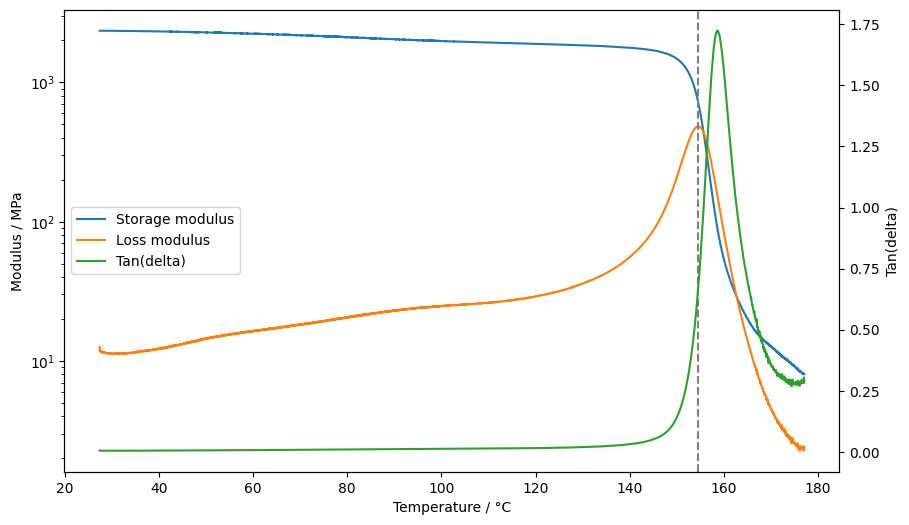

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.semilogy(df["Temperature / °C"], df["Storage modulus / MPa"], label="Storage modulus")
ax1.semilogy(df["Temperature / °C"], df["Loss modulus / MPa"], label="Loss modulus")
ax1.set_xlabel("Temperature / °C")
ax1.set_ylabel("Modulus / MPa")

ax2 = ax1.twinx()
ax2.plot(df["Temperature / °C"], df["Tan(delta)"], color="#2ca02c", label="Tan(delta)")
ax2.set_ylabel("Tan(delta)")

glass_transition = df.loc[df['Loss modulus / MPa'].idxmax(), 'Temperature / °C']
ax1.axvline(glass_transition, color="grey", linestyle="dashed")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left')

print(f"Glass transition at {glass_transition:.1f}°C")
plt.show()